In [27]:

import csv
import json
import pandas as pd
import os
from datetime import datetime
from pytz import timezone
import matplotlib.pyplot as plt
import datetime
import urllib
import numpy as np
import plotly.graph_objects as go



In [28]:
# load the two csv files
raw_df = pd.read_csv("raw_data/raw_politcal_posts_three.csv")
print(raw_df.shape)


raw_df2 = pd.read_csv("raw_data/raw_politcal_posts_two.csv")
print(raw_df2.shape)

#combine and remove duplicates
all_df = pd.concat([raw_df, raw_df2])
all_df = all_df.drop_duplicates(subset=['id'])
print(all_df.shape)


(2434, 9)
(2413, 9)
(2423, 9)


In [29]:
# columns subreddit
subreddits = all_df['subreddit'].unique()
print(subreddits)
print(len(subreddits))

['Libertarian' 'Anarchism' 'socialism' 'progressive' 'Conservative'
 'americanpirateparty' 'democrats' 'Liberal' 'Republican'
 'LibertarianLeft' 'Liberty' 'Anarcho_Capitalism' 'alltheleft' 'neoprogs'
 'labor' 'blackflag' 'GreenParty' 'democracy' 'IWW' 'Marxism'
 'Objectivism' 'LibertarianSocialism' 'Capitalism' 'feminisms'
 'republicans' 'Egalitarianism' 'anarchafeminism' 'SocialDemocracy'
 'Postleftanarchism' 'AnarchoPacifism' 'conservatives' 'voluntarism'
 'PirateParty' 'Anarchist' 'Communist']
35


In [30]:
# Republican, republicans 
all_df.loc[all_df['subreddit'] == 'republicans', 'subreddit'] = 'Republican'

# Anarchism, Anarchist
all_df.loc[all_df['subreddit'] == 'Anarchism', 'subreddit'] = 'Anarchist'

# americanpirateparty, PirateParty
all_df.loc[all_df['subreddit'] == 'americanpirateparty', 'subreddit'] = 'PirateParty'

subred_rows = all_df['subreddit'].unique()
print(subred_rows)
print(len(subred_rows))

['Libertarian' 'Anarchist' 'socialism' 'progressive' 'Conservative'
 'PirateParty' 'democrats' 'Liberal' 'Republican' 'LibertarianLeft'
 'Liberty' 'Anarcho_Capitalism' 'alltheleft' 'neoprogs' 'labor'
 'blackflag' 'GreenParty' 'democracy' 'IWW' 'Marxism' 'Objectivism'
 'LibertarianSocialism' 'Capitalism' 'feminisms' 'Egalitarianism'
 'anarchafeminism' 'SocialDemocracy' 'Postleftanarchism' 'AnarchoPacifism'
 'conservatives' 'voluntarism' 'Communist']
32


In [31]:
# generate how many post exist for each subreddit
subred_count = all_df['subreddit'].value_counts()
print(subred_count)


Conservative            220
Libertarian             206
Anarcho_Capitalism      204
Anarchist               203
socialism               202
Republican              173
conservatives           127
democrats               122
progressive             115
GreenParty              112
Liberal                 112
alltheleft              111
SocialDemocracy          98
Capitalism               87
Objectivism              60
blackflag                47
Marxism                  39
feminisms                35
labor                    32
democracy                27
LibertarianSocialism     21
IWW                      18
LibertarianLeft          14
Egalitarianism           10
PirateParty               6
Postleftanarchism         6
neoprogs                  5
AnarchoPacifism           4
Liberty                   3
anarchafeminism           2
voluntarism               1
Communist                 1
Name: subreddit, dtype: int64


In [32]:
# filter out subreddits with less than 50 posts from the main dataframe
all_df = all_df[all_df['subreddit'].isin(subred_count.index[subred_count > 50])]
subred_count = subred_count[subred_count > 50]
print(subred_count)
print(len(subred_count))


Conservative          220
Libertarian           206
Anarcho_Capitalism    204
Anarchist             203
socialism             202
Republican            173
conservatives         127
democrats             122
progressive           115
GreenParty            112
Liberal               112
alltheleft            111
SocialDemocracy        98
Capitalism             87
Objectivism            60
Name: subreddit, dtype: int64
15


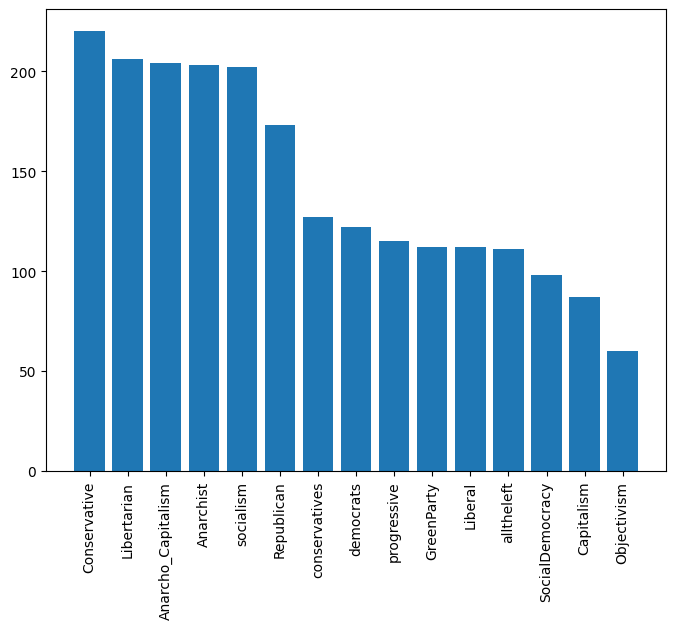

In [33]:
# make a bar plot that plots the count of subreddits
plt.figure(figsize=(8,6))
plt.bar(subred_count.index, subred_count.values)
plt.xticks(rotation=90)
plt.show()

Creating the future df to add things to 

In [65]:
#make a df that has a claim column and if text or title
df_one = pd.DataFrame(columns=['claim', 'type', 'subreddit'])


In [66]:
# This contains purely text that is good to analyze

#drop NaN from selftext
text_df = all_df.dropna(subset=['selftext'])
text_df = text_df.drop_duplicates(subset=['selftext'])

#make it into a list and split it by space
text_df['selftext'] = text_df['selftext'].apply(lambda x: x.split())

#drop duplicates


print(text_df['selftext'].head())
print(text_df.shape)


0     [It’s, coming, so, we, got, to, be, prepared, ...
4     [I, consider, myself, a, believer, in, what, i...
6     [Just, like, the, title, says,, I, wonder, why...
7     [Do, you, believe, humanity, taking, collectiv...
10    [I, hear, in, the, media, on, how, the, climat...
Name: selftext, dtype: object
(648, 9)


In [67]:

for index, row in text_df.iterrows():
    df_one = df_one.append({'claim': row['selftext'], 'type': 'text', 'subreddit': row['subreddit']}, ignore_index=True)
#drop null rows
df_one = df_one.dropna(subset=['claim'])


print(df_one.head())
print(df_one.shape)

                                               claim  type    subreddit
0  [It’s, coming, so, we, got, to, be, prepared, ...  text  Libertarian
1  [I, consider, myself, a, believer, in, what, i...  text  Libertarian
2  [Just, like, the, title, says,, I, wonder, why...  text  Libertarian
3  [Do, you, believe, humanity, taking, collectiv...  text  Libertarian
4  [I, hear, in, the, media, on, how, the, climat...  text  Libertarian
(648, 3)


In [68]:

title_df = all_df.dropna(subset=['title'])
print(title_df.shape)


#drop duplicates
title_df = title_df.drop_duplicates(subset=['title'])


#get all of the titles into a list 
title_df['title'] = title_df['title'].apply(lambda x: x.split())
print(title_df['title'])

#filter the list to not include list that have less than 15 words
# create boolean mask based on title length
mask = title_df['title'].apply(lambda x: len(' '.join(x)) > 15)

# filter dataframe based on boolean mask
title_df = title_df[mask]


print(title_df.shape)



(2152, 9)
0       [What, is, the, Libertarian, solution, to, cli...
1       [Prof, Anastasios, Tsonis:, University, of, Wi...
2       [Three, Supreme, Court, cases, to, watch, beyo...
3       [Supreme, Court, limits, EPA’s, power, to, com...
4       [A, green, libertarian, perspective:, is, bad,...
                              ...                        
499     [Judicial, Watch, files, lawsuit, to, obtain, ...
915     [The, Paris, Climate, Agreement, Won't, Change...
1015    [Global, climate, change, -, Sobriety, not, au...
1187    [Ahead, of, UN, summit,, leading, scientists, ...
1632    [Climate, Misanthropes, Say, Fighting, Climate...
Name: title, Length: 2022, dtype: object
(2005, 9)


In [70]:

df_two = pd.DataFrame(columns=['claim','type',"subreddit"])
for index, row in title_df.iterrows():
    df_two = df_two.append({'claim': row['title'], 'type': 'title', 'subreddit': row['subreddit']}, ignore_index=True)
df_two = df_two.dropna(subset=['claim'])

print(df_two.head())
print(df_two.shape)


                                               claim   type    subreddit
0  [What, is, the, Libertarian, solution, to, cli...  title  Libertarian
1  [Prof, Anastasios, Tsonis:, University, of, Wi...  title  Libertarian
2  [Three, Supreme, Court, cases, to, watch, beyo...  title  Libertarian
3  [Supreme, Court, limits, EPA’s, power, to, com...  title  Libertarian
4  [A, green, libertarian, perspective:, is, bad,...  title  Libertarian
(2005, 3)


In [71]:
#combine the two df
df = pd.concat([df_one, df_two])
print(df.head())
print(df.shape)

#make the claim type back into a string

                                               claim  type    subreddit
0  [It’s, coming, so, we, got, to, be, prepared, ...  text  Libertarian
1  [I, consider, myself, a, believer, in, what, i...  text  Libertarian
2  [Just, like, the, title, says,, I, wonder, why...  text  Libertarian
3  [Do, you, believe, humanity, taking, collectiv...  text  Libertarian
4  [I, hear, in, the, media, on, how, the, climat...  text  Libertarian
(2653, 3)


In [72]:
#save the data
df.to_csv("clean/political_posts.csv", index=False)

In [73]:
# sample 10 posts
df = df.sample(10)
df_list = list(df["claim"])
print(df_list[7])

# turn it into a text 
text = ' '.join(df_list[5])
print(text)



['9', 'of', "Hollywood's", 'Biggest', 'Acts', 'of', 'Hypocrisy:', 'China,', '#MeToo,', 'Guns,', 'Climate', 'Change,', 'and', 'More']
Imagine if the gov had the same level of customer service as a sucsessful buisness.
